In [ ]:
df_ambientes = pd.read_csv("df_ambientes")

In [ ]:
from sklearn import datasets, linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.cross_validation import cross_val_score

def props_analysis(df, neighborhood, tipo_prop, feat_x, feat_y, normalizo, calc_intercept):
    df_filtered = df[(df.barrio == neighborhood) & (df.tipo_prop == tipo_prop)]
    full_exploration(df_filtered, feat_x, feat_y, normalizo, calc_intercept)

def full_exploration(df, feat_x, feat_y, normalizo, calc_intercept):

    # Creamos los arrays para X e y, según las columnas indicadas en los parámetros
    X = df[[feat_x]]
    y = df[[feat_y]]

    print('Shape X: ', X.shape)
    print('Shape y: ', y.shape)
    
    # Primera visalización de los datos, para ver la dispersión de los puntos
    print('Primera visalización de los datos, para ver la dispersión de los puntos')
    plt.scatter(X, y)
    plt.xlabel(feat_x)
    plt.ylabel(feat_y)
    plt.show()
    
    print('Separo los datos de entrenamiento y prueba (train_test_split(X, y, test_size = 0.2))...')    
    # separo los datos de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
    
    print('Defino el algoritmo a utilizar, en este caso una Regresión lineal (linear_model.LinearRegression())...')      
    # defino el algoritmo a utilizar, en este caso una Regresión lineal
    lr = linear_model.LinearRegression()
    
    #lr = linear_model.LinearRegression(normalize=normalizo, fit_intercept=calc_intercept)
    print( 'Entreno el modelo (fit(X_train, y_train))...')     
    # entreno el modelo
    lr.fit(X_train, y_train)
    
    print( 'Realizo el test con el modelo con los valores reservados (predict(X_test))...')     
    # Realizo el test con el modelo con los valores reservados    
    Y_pred = lr.predict(X_test)
    
    # vemos gráficamente el resultado
    print('Vemos gráficamente el resultado de la regresión')
    plt.scatter(X_test, y_test)
    plt.plot(X_test, Y_pred, color='Red', linewidth=3)
    plt.title("Regresión lineal simple")
    plt.xlabel(feat_x)
    plt.ylabel(feat_y)
    plt.show()
    
    print('DATOS DEL MODELO DE REGRESION')
    print('')
    print('Valor de la pendiente o coeficiente "a":', lr.coef_)
    print('Valor del intersecto o coeficiente "b":', lr.intercept_)
    print('La ecuación del modelo es igual a : y= ',lr.coef_,' x= ',lr.intercept_)
    print('')
    print('La precisión (score) del modelo:', lr.score(X_train, y_train))
    #print('')
    #print('El error absoluto medio (MAE) es la media del valor absoluto de los errores.es el error promedio.')
    #print('MAE:', metrics.mean_absolute_error(y_test, Y_pred))
    #print('Mean Squared Error (MSE) es la media de los errores al cuadrado. "penaliza" errores grandes')
    #print('MSE:', metrics.mean_squared_error(y_test, Y_pred))
    #print('Error cuadrático medio raíz (RMSE) es la raíz cuadrada de la media de los errores al cuadrado')
    #print('Es interpretable, tiene las mismas unidades que la "y".')
    #print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, Y_pred)))
    #print('R2 es la proporción de la varianza total de Y explicada por el modelo')
    #print('R2:',metrics.r2_score(y_test, Y_pred))
    
    print('')
    print('Cross validation con 5 fold CV: ')
    print(cross_val_score(lr, X, y, cv=5))
    print('')

In [ ]:
props_analysis(df_impoluto, 'Belgrano', 'apartment', "sup_cubierta_m2", "precio", False, True)

# Probamos con Lasso con df_ambientes

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import random
%matplotlib inline 

from sklearn.model_selection import train_test_split
from sklearn.cross_validation import cross_val_score
from scipy import stats
from sklearn import datasets, linear_model, metrics
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

/opt/conda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
df_ambientes = pd.read_csv("df_ambientes")

In [3]:
df_ambientes.head()

,Unnamed: 0,tipo_prop,barrio,provincia,precio,sup_total_m2,sup_cubierta_m2,precio_usd_m2,ambientes,flag_plus,flag_banio,flag_cochera
0,16,PH,Mataderos,Capital Federal,239000.0,140.0,98.0,1707.142857,4.0,1,1,1
1,254,PH,Mataderos,Capital Federal,53000.0,28.0,28.0,1892.857143,1.0,1,1,1
2,557,PH,Mataderos,Capital Federal,245000.0,326.0,160.0,751.533742,4.0,1,1,1
3,559,PH,Mataderos,Capital Federal,165000.0,150.0,150.0,1100.000000,3.0,1,1,1
4,5178,PH,Mataderos,Capital Federal,158000.0,90.0,70.0,1755.555556,3.0,1,1,1


In [4]:
df_ambientes.shape

(21529, 12)

In [5]:
dm=pd.get_dummies(df_ambientes[["tipo_prop","barrio"]])

In [6]:
dm.columns

Index(['tipo_prop_PH', 'tipo_prop_apartment', 'tipo_prop_house',
       'tipo_prop_store', 'barrio_Abasto', 'barrio_Acacias Blancas',
       'barrio_Acassuso', 'barrio_Adrogué', 'barrio_Agronomía',
       'barrio_Almagro',
       ...
       'barrio_Villa Pueyrredón', 'barrio_Villa Real', 'barrio_Villa Rosa',
       'barrio_Villa Santa Rita', 'barrio_Villa Sarmiento',
       'barrio_Villa Urquiza', 'barrio_Villa de Mayo',
       'barrio_Villa del Parque', 'barrio_Virreyes', 'barrio_Wilde'],
      dtype='object', length=245)

In [7]:
df_final=pd.concat( (df_ambientes, dm), axis=1)

In [8]:
features_num =['sup_total_m2', 'sup_cubierta_m2']
features_d = dm.columns
X_train, X_test, y_train, y_test=train_test_split(df_final[features_num + features_d.tolist()], df_final.precio)

scaler = StandardScaler()
X_train[features_num] = scaler.fit_transform(X_train[features_num])
X_test[features_num]  =  scaler.transform(X_test[features_num])

model = LassoCV(alphas=np.linspace(0.001, 1, 300), cv=10, n_jobs=-1, max_iter=10000)
model.fit(X_train, y_train)

y_predict = model.predict(X_test)

r2_score(y_test, y_predict)


0.7186755903048201

In [9]:
y_predict_train = model.predict(X_train)
y_predict_train

array([154264.11709364, 143483.49905052, 155853.38158907, ...,
       513650.63074707,  46998.0583839 ,  65437.07969154])

In [10]:
X_train["precio"] = y_train

##feat_x = df_final[features_num + features_d.tolist()].columns
##feat_x

In [11]:
X_train["precio_pred"] = y_predict_train

In [12]:
X_train[["precio","precio_pred"]]

,precio,precio_pred
10794,125000.00,154264.117094
4553,149000.00,143483.499051
17542,133500.00,155853.381589
20564,190000.00,94625.509676
4084,244737.72,179120.054219
9024,36454.38,45367.429489
1295,104000.00,144510.479875
6537,87000.00,118565.005780
7707,53000.00,62328.835785
19249,165000.00,187881.879028


In [13]:
X_train["precio_dif"] = X_train["precio"] - X_train["precio_pred"]

In [14]:
X_train[["precio_dif","precio","precio_pred"]].describe()

,precio_dif,precio,precio_pred
count,1.614600e+04,1.614600e+04,1.614600e+04
mean,3.022501e-11,1.779375e+05,1.779375e+05
std,8.869421e+04,1.633394e+05,1.370783e+05
min,-5.827933e+05,7.010450e+03,-8.782328e+04
25%,-2.865307e+04,8.700000e+04,9.162000e+04
50%,-1.803396e+03,1.300000e+05,1.440518e+05
75%,2.451769e+04,2.000000e+05,2.172028e+05
max,9.623927e+05,2.200000e+06,1.308717e+06


# Utilizo el dataset impoluto con Lasso


In [57]:
import numpy as np
import pandas as pd
df_impoluto = pd.read_csv("df_impoluto")

In [58]:
df_impoluto.head()

,Unnamed: 0,tipo_prop,barrio,provincia,precio,sup_total_m2,sup_cubierta_m2,precio_usd_m2,flag_plus,flag_banio,flag_cochera
0,0,PH,Mataderos,Capital Federal,62000.0,55.0,40.0,1127.272727,1,1,1
1,2,apartment,Mataderos,Capital Federal,72000.0,55.0,55.0,1309.090909,1,1,1
2,16,PH,Mataderos,Capital Federal,239000.0,140.0,98.0,1707.142857,1,1,1
3,254,PH,Mataderos,Capital Federal,53000.0,28.0,28.0,1892.857143,1,1,1
4,557,PH,Mataderos,Capital Federal,245000.0,326.0,160.0,751.533742,1,1,1


In [59]:
df_impoluto.isna().sum()

Unnamed: 0         0
tipo_prop          0
barrio             0
provincia          0
precio             0
sup_total_m2       0
sup_cubierta_m2    0
precio_usd_m2      0
flag_plus          0
flag_banio         0
flag_cochera       0
dtype: int64

In [13]:
dm=pd.get_dummies(df_impoluto[["tipo_prop","barrio"]])


In [14]:
dm.columns

Index(['tipo_prop_PH', 'tipo_prop_apartment', 'tipo_prop_house',
       'tipo_prop_store', 'barrio_Abasto', 'barrio_Acacias Blancas',
       'barrio_Acassuso', 'barrio_Adrogué', 'barrio_Agronomía',
       'barrio_Almagro',
       ...
       'barrio_Villa Pueyrredón', 'barrio_Villa Real', 'barrio_Villa Rosa',
       'barrio_Villa Santa Rita', 'barrio_Villa Sarmiento',
       'barrio_Villa Urquiza', 'barrio_Villa de Mayo',
       'barrio_Villa del Parque', 'barrio_Virreyes', 'barrio_Wilde'],
      dtype='object', length=268)

In [15]:
df_final = pd.concat((df_impoluto,dm),axis=1)

In [16]:
df_final.drop("Unnamed: 0",axis = 1,inplace = True)

In [17]:
features_num =['sup_total_m2', 'sup_cubierta_m2']
features_d = dm.columns
X_train, X_test, y_train, y_test=train_test_split(df_final[features_num + features_d.tolist()], df_final.precio)


scaler = StandardScaler()
X_train[features_num] = scaler.fit_transform(X_train[features_num])
X_test[features_num]  =  scaler.transform(X_test[features_num])

In [18]:
model = LassoCV(alphas=np.linspace(0.001, 1, 200), cv=10, n_jobs=-1, max_iter=10000)

In [19]:
model.fit(X_train,y_train)

LassoCV(alphas=array([0.001  , 0.00602, ..., 0.99498, 1.     ]), copy_X=True,
    cv=10, eps=0.001, fit_intercept=True, max_iter=10000, n_alphas=100,
    n_jobs=-1, normalize=False, positive=False, precompute='auto',
    random_state=None, selection='cyclic', tol=0.0001, verbose=False)

In [20]:
y_predict = model.predict(X_test)
r2_score(y_test, y_predict)

0.7257433372059507

In [21]:
y_predict_train = model.predict(X_train)
y_predict_test = model.predict(X_test)

In [22]:
X_train["precio_pred"] = y_predict_train
X_test["precio_pred"] = y_predict_test

In [23]:
X_train["precio"] = y_train
X_test["precio"] = y_test

In [24]:
X = pd.concat((X_train,X_test),axis = 0)

In [25]:
X["precio_dif"] = X["precio"]-X["precio_pred"]

In [26]:
X_precio = X[["precio_dif","precio","precio_pred"]].sort_index()

In [27]:
X_precio.describe()

,precio_dif,precio,precio_pred
count,4.609400e+04,4.609400e+04,4.609400e+04
mean,2.757601e+02,1.864922e+05,1.862164e+05
std,8.332011e+04,1.604815e+05,1.374319e+05
min,-5.740143e+05,7.010450e+03,-4.522198e+05
25%,-2.988350e+04,8.890000e+04,9.607152e+04
50%,-3.716394e+03,1.350000e+05,1.492393e+05
75%,2.458029e+04,2.290000e+05,2.291691e+05
max,1.190938e+06,2.250000e+06,1.201235e+06


# Probamos con Ridge

In [47]:
features_num =['sup_total_m2', 'sup_cubierta_m2']
features_d = dm.columns
X_train, X_test, y_train, y_test=train_test_split(df_final[features_num + features_d.tolist()], df_final.precio)

scaler = StandardScaler()
X_train[features_num] = scaler.fit_transform(X_train[features_num])
X_test[features_num]  =  scaler.transform(X_test[features_num])

model = RidgeCV(alphas=np.linspace(0.001, 1, 300), cv=10)
model.fit(X_train, y_train)

y_predict = model.predict(X_test)

r2_score(y_test, y_predict)


KeyboardInterrupt: 

In [ ]:
y_predict_train = model.predict(X_train)
y_predict_test = model.predict(X_test)
X_train["precio_pred"] = y_predict_train
X_test["precio_pred"] = y_predict_test
X_train["precio"] = y_train
X_test["precio"] = y_test

In [ ]:
X = pd.concat((X_train,X_test),axis = 0)

In [ ]:
X["precio_dif"] = X["precio"]-X["precio_pred"]

In [ ]:
X_precio.describe()

# Hacemos la prueba con un sampleo de 100 propiedades en el mejor modelo escogido: Lasso

### Elegimos 100 muestras del X que ya fue predicho dentro del modelo. Seleccionamos el modelo Lasso para este dataset, ya que nos brinda el mejor score (0.73) . Utilizamos las X predichas de ese modelo.

In [28]:
portfolio = X_precio.sample(100)

In [29]:
portfolio

,precio_dif,precio,precio_pred
36373,-37061.390550,95103.30,132164.690550
27440,37361.074918,297500.00,260138.925082
3292,50554.877038,141274.78,90719.902962
29412,-44689.378208,315000.00,359689.378208
13480,259707.515000,602300.00,342592.485000
6985,3784.186491,280000.00,276215.813509
44933,4891.960260,85000.00,80108.039740
23126,-21889.758409,120000.00,141889.758409
13131,-23046.721939,105000.00,128046.721939
31846,-10900.819800,102987.29,113888.109800


In [30]:
# Si precio-precio predict > 0, está sobre valorado.
#Si precio-precio predict < 0, está subvaluado. 
#Separar en df_oportunidades (2do criterio)
df_oportunidades = portfolio.loc[portfolio["precio_dif"]<0]

In [31]:
df_oportunidades

,precio_dif,precio,precio_pred
36373,-37061.390550,95103.30,132164.690550
29412,-44689.378208,315000.00,359689.378208
23126,-21889.758409,120000.00,141889.758409
13131,-23046.721939,105000.00,128046.721939
31846,-10900.819800,102987.29,113888.109800
28881,-24072.156950,295000.00,319072.156950
16567,-35692.238759,75000.00,110692.238759
28792,-62321.242722,235000.00,297321.242722
12464,-36881.615030,98000.00,134881.615030
31723,-10324.371444,123360.00,133684.371444


In [32]:
df_oportunidades.index

Int64Index([36373, 29412, 23126, 13131, 31846, 28881, 16567, 28792, 12464,
            31723, 11619, 29244, 32207, 24433, 20396, 21146, 38254, 24787,
            12772, 28234,   299, 25880,  6797, 18070, 33403,   626,  3020,
            45586,  6592,  1509, 39586, 19080, 12023, 21898,  9249,  6149,
            18518, 26201, 18296, 42579,  9553, 33326, 29508, 12860, 21855,
            27940, 10182, 24387, 35335, 45995, 45414, 39520, 23600, 35324],
           dtype='int64')

In [33]:
#dropeamos columna precio ya que será agregada posteriormente
df_oportunidades.drop("precio", axis = 1, inplace = True)

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [34]:
#agrego las columnas que habíamos convertido en dummie
df_oportunidades_full = pd.concat((df_oportunidades,df_final.iloc[df_oportunidades.index]),axis = 1)

In [35]:
df_oportunidades_full.columns

Index(['precio_dif', 'precio_pred', 'tipo_prop', 'barrio', 'provincia',
       'precio', 'sup_total_m2', 'sup_cubierta_m2', 'precio_usd_m2',
       'flag_plus',
       ...
       'barrio_Villa Pueyrredón', 'barrio_Villa Real', 'barrio_Villa Rosa',
       'barrio_Villa Santa Rita', 'barrio_Villa Sarmiento',
       'barrio_Villa Urquiza', 'barrio_Villa de Mayo',
       'barrio_Villa del Parque', 'barrio_Virreyes', 'barrio_Wilde'],
      dtype='object', length=280)

In [36]:
#me quedo con las columnas relevantes
df_oportunidades_full = df_oportunidades_full.iloc[:,0:13]


In [37]:
df_oportunidades_full

,precio_dif,precio_pred,tipo_prop,barrio,provincia,precio,sup_total_m2,sup_cubierta_m2,precio_usd_m2,flag_plus,flag_banio,flag_cochera,tipo_prop_PH
36373,-37061.390550,132164.690550,apartment,Rincón de Milberg,Bs.As. G.B.A. Zona Norte,95103.30,44.0,37.0,2161.438636,1,1,1,0
29412,-44689.378208,359689.378208,apartment,Recoleta,Capital Federal,315000.00,116.0,116.0,2715.517241,1,1,1,0
23126,-21889.758409,141889.758409,apartment,Capital Federal,Capital Federal,120000.00,50.0,46.0,2400.000000,1,1,1,0
13131,-23046.721939,128046.721939,apartment,Flores,Capital Federal,105000.00,67.0,56.0,1567.164179,1,1,1,0
31846,-10900.819800,113888.109800,apartment,Villa Urquiza,Capital Federal,102987.29,37.0,32.0,2783.440270,1,1,1,0
28881,-24072.156950,319072.156950,apartment,Recoleta,Capital Federal,295000.00,103.0,93.0,2864.077670,1,1,1,0
16567,-35692.238759,110692.238759,apartment,Caballito,Capital Federal,75000.00,32.0,32.0,2343.750000,1,1,1,0
28792,-62321.242722,297321.242722,apartment,Recoleta,Capital Federal,235000.00,89.0,81.0,2640.449438,1,0,1,0
12464,-36881.615030,134881.615030,apartment,Castelar,Bs.As. G.B.A. Zona Oeste,98000.00,70.0,70.0,1400.000000,1,1,1,0
31723,-10324.371444,133684.371444,apartment,Villa Urquiza,Capital Federal,123360.00,48.0,43.0,2570.000000,1,1,1,0


In [38]:
df_oportunidades_full.groupby(["provincia","precio_dif","sup_total_m2","precio_usd_m2","tipo_prop"]).sum().sort_values("precio_dif",ascending = False)

precio_pred  \
provincia                    precio_dif     sup_total_m2 precio_usd_m2 tipo_prop                  
Buenos Aires Costa Atlántica -1645.641333   60.0         2748.333333   apartment  166545.641333   
Bs.As. G.B.A. Zona Norte     -4410.882550   130.0        1423.076923   house      189410.882550   
                             -5673.636894   41.0         1463.414634   apartment   65673.636894   
Capital Federal              -6434.544655   150.0        2533.333333   apartment  386434.544655   
Santa Fe                     -6677.000974   73.0         1223.108082   apartment   95963.890974   
Bs.As. G.B.A. Zona Norte     -7373.791470   68.0         1253.641618   apartment   92621.421470   
                             -7473.297043   42.0         1428.571429   apartment   67473.297043   
Buenos Aires Costa Atlántica -7473.324716   27.0         1851.851852   apartment   57473.324716   
Bs.As. G.B.A. Zona Oeste     -8156.859596   45.0         1422.222222   apartment   72156.859596   
Córdoba                      -8843.139714   50.0         1121.673400   apartment   64926.809714   
Bs.As. G.B.A. Zona Sur       -9631.028305   41.0         1878.048780   apartment   86631.028305   
Capital Federal              -10324.371444  48.0         2570.000000   apartment  133684.371444   
Buenos Aires Costa Atlántica -10868.906658  40.0         1750.000000   apartment   80868.906658   
Capital Federal              -10900.819800  37.0         2783.440270   apartment  113888.109800   
                             -13515.081496  40.0         1906.845000   apartment   89788.881496   
Bs.As. G.B.A. Zona Norte     -13553.758013  137.0        1200.729927   house      178053.758013   
Bs.As. G.B.A. Zona Oeste     -14139.272082  190.0        1263.157895   house      254139.272082   
Buenos Aires Costa Atlántica -14459.730691  67.0         1716.417910   apartment  129459.730691   
Capital Federal              -16529.915521  78.0         1743.589744   apartment  152529.915521   
Bs.As. G.B.A. Zona Norte     -16975.402111  99.0         1969.696970   apartment  211975.402111   
Bs.As. G.B.A. Zona Sur       -19183.851421  48.0         1460.512292   apartment   89288.441421   
Capital Federal              -19812.671686  34.0         2087.137353   apartment   90775.341686   
                             -21889.758409  50.0         2400.000000   apartment  141889.758409   
                             -23046.721939  67.0         1567.164179   apartment  128046.721939   
                             -24072.156950  103.0        2864.077670   apartment  319072.156950   
                             -24489.366980  36.0         2888.888889   apartment  128489.366980   
Córdoba                      -27136.455240  350.0        300.000000    house      132136.455240   
Bs.As. G.B.A. Zona Norte     -27291.444457  960.0        250.000000    house      267291.444457   
Capital Federal              -30463.998759  48.0         1500.000000   apartment  102463.998759   
Buenos Aires Costa Atlántica -31144.651857  116.0        1206.896552   apartment  171144.651857   
Bs.As. G.B.A. Zona Norte     -33552.535306  60.0         2083.333333   apartment  158552.535306   
                             -34137.608713  59.0         2694.915254   apartment  193137.608713   
Capital Federal              -34340.181615  37.0         2756.756757   apartment  136340.181615   
                             -35692.238759  32.0         2343.750000   apartment  110692.238759   
Bs.As. G.B.A. Zona Norte     -36436.723213  58.0         1954.310345   apartment  149786.723213   
Bs.As. G.B.A. Zona Oeste     -36881.615030  70.0         1400.000000   apartment  134881.615030   
Bs.As. G.B.A. Zona Norte     -37061.390550  44.0         2161.438636   apartment  132164.690550   
Bs.As. G.B.A. Zona Oeste     -39902.487883  250.0        600.000000    house      189902.487883   
                             -41591.777566  392.0        375.000000    store      188591.777566   
Capital Federal          

In [39]:
df_oportunidades_full.sum()
#Vemos que las propiedades en su gran mayoría tienen amenities (53 de 56 oportunidades) y cochera (54 de 56 oportunidades)
#Esto puede indicarnos que están subvaluando estos "extras" los propietarios.
# La mayoría son departamentos!

precio_dif                                              -2.03565e+06
precio_pred                                              9.18349e+06
tipo_prop          apartmentapartmentapartmentapartmentapartmenta...
barrio             Rincón de MilbergRecoletaCapital FederalFlores...
provincia          Bs.As. G.B.A. Zona NorteCapital FederalCapital...
precio                                                   7.14784e+06
sup_total_m2                                                    6644
sup_cubierta_m2                                                 4160
precio_usd_m2                                                95054.6
flag_plus                                                         49
flag_banio                                                        53
flag_cochera                                                      51
tipo_prop_PH                                                       3
dtype: object

In [40]:
df_oportunidades_full["tipo_prop"].value_counts()

apartment    42
house         8
PH            3
store         1
Name: tipo_prop, dtype: int64

In [41]:
df_oportunidades_full.groupby(["provincia","barrio","flag_plus","flag_cochera"])["tipo_prop"].value_counts()

provincia                     barrio                flag_plus  flag_cochera  tipo_prop
Bs.As. G.B.A. Zona Norte      Belén de Escobar      1          1             house        1
                              Nordelta              0          1             apartment    1
                                                    1          1             apartment    2
                              Pilar                 1          1             apartment    1
                                                                             house        1
                              Rincón de Milberg     1          1             apartment    1
                              San Andres            1          1             PH           1
                              San Fernando          1          0             apartment    1
                                                                             house        1
                              San Miguel            1          1             apartmen

In [42]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'precio diferencia')

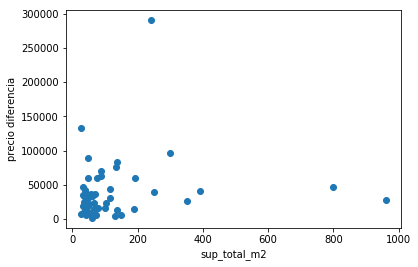

In [65]:
plt.scatter(df_oportunidades_full["sup_total_m2"],df_oportunidades_full["precio_dif"]*(-1))
plt.xlabel("sup_total_m2")
plt.ylabel("precio diferencia")

In [44]:
#No hay correlación entre diferencia de precio y superficie. Es decir, a mayor superficie no hay una prima
#de riesgo por mayor desembolso en aquella propiedad.
#Por lo tanto, recomendamos a los inversores diversificar sus inversiones en propiedades de menor tamaño,
#disminuyendo así las posibilidades de grandes pérdidas.



In [45]:
#precio - precio pred = precio dif
# precio = precio dif + precio pred
df_oportunidades["precio"] = df_oportunidades["precio_dif"] + df_oportunidades["precio_pred"]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [46]:
presupuesto = df_oportunidades["precio"].sum()

In [47]:
#Presupuesto inicial

presupuesto

7147844.34

In [48]:
df_oportunidades_full["precio"].loc[df_oportunidades_full["sup_total_m2"]<100].sum()

3960344.34

In [49]:
df_oportunidades_0a100 = df_oportunidades_full.loc[df_oportunidades_full["sup_total_m2"]<100]

In [50]:
df_oportunidades_0a100.groupby("provincia").count()

,precio_dif,precio_pred,tipo_prop,barrio,precio,sup_total_m2,sup_cubierta_m2,precio_usd_m2,flag_plus,flag_banio,flag_cochera,tipo_prop_PH
provincia,,,,,,,,,,,,
Bs.As. G.B.A. Zona Norte,10,10,10,10,10,10,10,10,10,10,10,10
Bs.As. G.B.A. Zona Oeste,2,2,2,2,2,2,2,2,2,2,2,2
Bs.As. G.B.A. Zona Sur,2,2,2,2,2,2,2,2,2,2,2,2
Buenos Aires Costa Atlántica,5,5,5,5,5,5,5,5,5,5,5,5
Capital Federal,16,16,16,16,16,16,16,16,16,16,16,16
Córdoba,1,1,1,1,1,1,1,1,1,1,1,1
Santa Fe,1,1,1,1,1,1,1,1,1,1,1,1


In [51]:
#Inversión sugerida:
inversion_sugerida = df_oportunidades_0a100["precio"].sum()
inversion_sugerida

3960344.34

In [52]:
#Presupuesto libre
presupuesto_libre = presupuesto -inversion_sugerida 
presupuesto_libre

3187500.0

In [53]:
#Estimaciones de ganancias sin factorear tiempo
ganancias = df_oportunidades_0a100["precio_dif"].sum()*-1
ganancias

1107707.924633735

In [54]:
#Las propiedades de menor tamaño tienen mayor dinamismo en el mercado, hay mayor cantidad de transacciones.
#Esto nos puede ayudar a reducir el tiempo en el arbitraje de los inmuebles.

# Conclusión:
### Tomando en cuenta las predicciones de nuestro modelo (híper sólido), podemos buscar las propiedades donde encontrar oportunidades de inversión. Para esto, analizamos la diferencia entre precio y el precio predicho. Aquellos que hayan sido publicados a un valor por debajo de nuestra predicción lo podemos considerar una oportunidad de inversión.
### Para esto, analizamos si hay alguna prima por desembolso de mayor cantidad de dinero en una sola propiedad dada sus dimensiones y verificamos que esto no es así (en términos absolutos). Para ejemplificar:
#### Propiedad de 67m2 tiene una dif de precio de USD19817 y propiedad de 600 m2 tiene una dif de USD 8846.
#### La relación entre estas variables nos lleva a sugerir la diversificación en la mayor cantidad de propiedades posibles, menores a 100 m2. 
#### Esto nos permitiría colocarnos en mayor cantidad de propiedades, reduciendo el riesgo y con desembolsos menos cuantiosos.
#### Otro punto a tener en cuenta, el mercado de inmuebles en este rango tienen mayor dinamismo que aquellos de grandes superficies. 
#### Esto nos ayuda a reducir la diferencia entre el momento de inversión y de venta, permitiéndonos arbitrar con mayor agresividad.




In [55]:
df_oportunidades_0a100.loc[df_oportunidades_0a100["sup_total_m2"]== 67]

,precio_dif,precio_pred,tipo_prop,barrio,provincia,precio,sup_total_m2,sup_cubierta_m2,precio_usd_m2,flag_plus,flag_banio,flag_cochera,tipo_prop_PH
13131,-23046.721939,128046.721939,apartment,Flores,Capital Federal,105000.0,67.0,56.0,1567.164179,1,1,1,0
19080,-14459.730691,129459.730691,apartment,Mar del Plata,Buenos Aires Costa Atlántica,115000.0,67.0,67.0,1716.417910,1,1,1,0


In [56]:
df_oportunidades_full.loc[df_oportunidades_full["sup_total_m2"]==600]

,precio_dif,precio_pred,tipo_prop,barrio,provincia,precio,sup_total_m2,sup_cubierta_m2,precio_usd_m2,flag_plus,flag_banio,flag_cochera,tipo_prop_PH


AttributeError: Unknown property legend

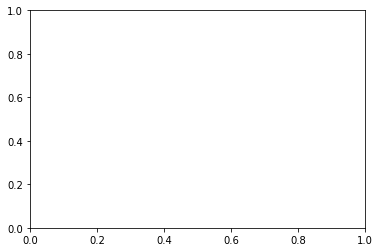

In [61]:
plt.scatter()